In [1]:
import pandas as pd 
import numpy as np
from sklearn import metrics
import seaborn as sn
import confusion_matrix_pretty_print
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,classification_report,precision_score
import keras

Using TensorFlow backend.


In [2]:
# data = pd.read_csv('../../saved F(triple_cosineSNF).csv')
# data = data[data['2']!=0]
# data.to_csv('triple_cosineSNF(-1and1).csv',index=False)
dataTrain = pd.read_csv('../../tripleTrain.csv')
dataTest = pd.read_csv('../../tripleTest.csv')

# data.shape

In [3]:
# data.head()

,0,1,2,3,4,5,6,7,8,9,...,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140
0,DB00115,DB00446,-1,0.549615,0.001501,0.001889,0.001586,0.001636,0.001509,0.001593,...,0.001627,0.001818,0.001136,0.001511,0.001725,0.001095,0.001690,0.003230,0.001841,0.001641
1,DB00115,DB01394,-1,0.549615,0.001501,0.001889,0.001586,0.001636,0.001509,0.001593,...,0.001611,0.001630,0.001144,0.001776,0.001584,0.001179,0.001584,0.001517,0.002265,0.001742
2,DB00130,DB00581,-1,0.001501,0.559153,0.001627,0.001619,0.001550,0.001471,0.002102,...,0.002565,0.001472,0.001119,0.001432,0.001507,0.001164,0.001576,0.001460,0.001528,0.001875
3,DB00136,DB00180,-1,0.001889,0.001627,0.558513,0.002973,0.001682,0.003315,0.001612,...,0.001423,0.001556,0.001322,0.001581,0.001391,0.001029,0.001431,0.001524,0.001446,0.001422
4,DB00136,DB00324,-1,0.001889,0.001627,0.558513,0.002973,0.001682,0.003315,0.001612,...,0.001475,0.001594,0.001192,0.001554,0.001489,0.001054,0.003244,0.003663,0.001570,0.001549


In [18]:
X_train, X_test = dataTrain.values[:,3:], dataTest.values[:,3:]
y_train, y_test = dataTrain.values[:,2].astype(int), dataTest.values[:,2].astype(int)

In [19]:
len(X_train)

38850

In [20]:
len(X_test)

3852

In [21]:
# 16*71

In [22]:
#reshape data to fit model
X_train = X_train.reshape(38850,16,71,1)
X_test = X_test.reshape(3852,16,71,1)

In [23]:
# X_train.shape

In [24]:
y_train = y_train + 1
y_test  = y_test + 1
y_train = y_train / 2
y_test  = y_test / 2
# print(y_train[0], y_test[0])

In [25]:
y_train

array([0., 0., 0., ..., 1., 1., 1.])

In [26]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# y_test[0]

In [32]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [152]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Softmax, Dropout


#create model
model = Sequential()
#add model layers
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
model.add(Conv2D(128, kernel_size=4, activation='relu', input_shape=(16,71,1)))
# model.add(Conv2D(64, kernel_size=2, activation='relu'))

model.add(Conv2D(32, kernel_size=4, activation='relu'))
# model.add(Conv2D(16, kernel_size=2, activation='relu'))
model.add(Conv2D(8, kernel_size=4, activation='relu'))
model.add(Flatten())
model.add(Dense( 1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense( 64, activation='relu'))
model.add(Dense( 2, activation='relu'))
model.add(Softmax(128))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 13, 68, 128)       2176      
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 10, 65, 32)        65568     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 7, 62, 8)          4104      
_________________________________________________________________
flatten_15 (Flatten)         (None, 3472)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              3556352   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                65600     
__________

In [153]:
#compile model using accuracy to measure model performance
from keras import optimizers
from keras import metrics as kmetr


adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
# model.compile(loss='hinge', optimizer=adam, metrics=[kmetr.categorical_accuracy])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ## Minist

In [154]:
# # Load the model's saved weights.
# model.load_weights('cnn.h5')

#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Train on 38850 samples, validate on 3852 samples
Epoch 1/15
38850/38850 [==============================] - 697s 18ms/step - loss: 0.3528 - acc: 0.8463 - val_loss: 0.2542 - val_acc: 0.8850
Epoch 2/15
38850/38850 [==============================] - 749s 19ms/step - loss: 0.2078 - acc: 0.9137 - val_loss: 0.1933 - val_acc: 0.9250
Epoch 3/15
38850/38850 [==============================] - 932s 24ms/step - loss: 0.1336 - acc: 0.9459 - val_loss: 0.1867 - val_acc: 0.9252
Epoch 4/15
38850/38850 [==============================] - 937s 24ms/step - loss: 0.0969 - acc: 0.9618 - val_loss: 0.1724 - val_acc: 0.9369
Epoch 5/15
38850/38850 [==============================] - 978s 25ms/step - loss: 0.0677 - acc: 0.9740 - val_loss: 0.1826 - val_acc: 0.9354
Epoch 6/15
38850/38850 [==============================] - 953s 25ms/step - loss: 0.0541 - acc: 0.9784 - val_loss: 0.1769 - val_acc: 0.9406
Epoch 7/15
38850/38850 [==============================] - 695s 18ms/step - loss: 0.0407 - acc: 0.9840 - val_loss: 0.2

In [155]:
# Saveing the Model
model.save_weights('cnn.h5')


In [177]:
#predict first 4 images in the test set
predit = model.predict(X_test)
predit

array([[1.1631330e-04, 9.9988365e-01],
       [1.1234836e-07, 9.9999988e-01],
       [4.3605773e-08, 1.0000000e+00],
       ...,
       [9.5965725e-01, 4.0342707e-02],
       [8.2164675e-02, 9.1783530e-01],
       [9.9999499e-01, 4.9987107e-06]], dtype=float32)

In [178]:
#actual results for first 4 images in test set
print(predicts[:4])
predit[:4]


[0, 0, 1, 0]


array([[1.1631330e-04, 9.9988365e-01],
       [1.1234836e-07, 9.9999988e-01],
       [4.3605773e-08, 1.0000000e+00],
       [1.0000000e+00, 7.4283344e-09]], dtype=float32)

In [180]:
#from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import auc, precision_recall_curve, roc_curve
prec, rec, thr = precision_recall_curve(y_test[:,0], predit[:,0])
aupr_val = auc(rec, prec)
fpr, tpr, thr = roc_curve(y_test[:,0], predit[:,0])
auc_val = auc(fpr, tpr)
print(aupr_val,auc_val)

0.94003071629 0.9832515585907059


In [181]:
# predit

In [182]:
predit[:,0].shape 

(3852,)

In [183]:
predicts = []
for a,b in predit:
    if a >=b:
        predicts.append(0)
    else:
        predicts.append(1)

[[ 699  130]
 [  57 2966]]
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       756
         1.0       0.98      0.96      0.97      3096

   micro avg       0.95      0.95      0.95      3852
   macro avg       0.91      0.94      0.93      3852
weighted avg       0.95      0.95      0.95      3852



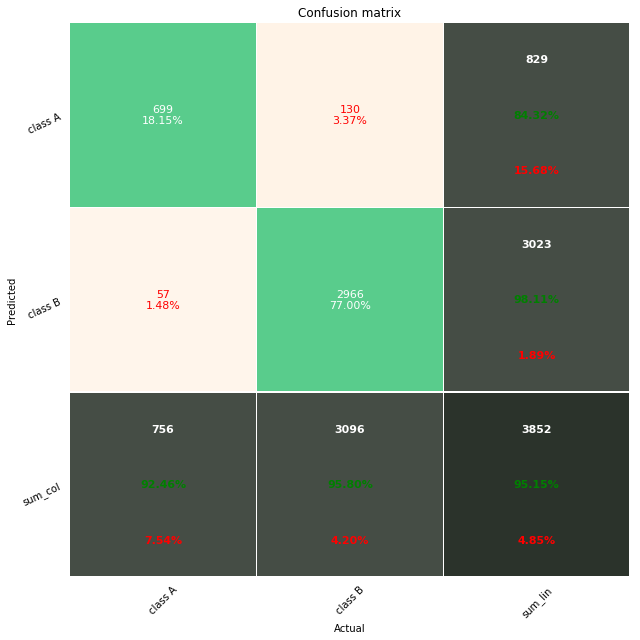

In [185]:

cm = metrics.confusion_matrix(list(predicts), list((dataTest.values[:,2]+1)/2))
print(cm)

CR = classification_report(list((dataTest.values[:,2]+1)/2),list(predicts))
print(CR)
# i=0
# for j in list(data.values[9500:,2]+1):
#     if j==1:
#         i +=1
# print(i)

# plt.show()
plot_confusion_matrix_from_data(list((dataTest.values[:,2]+1)/2), list(predicts))
